# Lesson: Transform

## Introduction

In a perfect world, every dataset you encounter would be 100% clean, accurate, and complete for ML. Unfortunately, this is not the world we live in. Transforming a dataset may take the majority of your time. And, there's a bit of an art to it. Data doesn't have a single _correct_ solution. Instead it takes a combination of technical knowledge, domain expertise, and practical experience to work through these challenges.

<blockquote cite="https://doi.org/10.2307/2986064" style="padding: 1rem 1rem 0.25rem 0.5rem;">
<p>
"All models are wrong, but some are useful."
</p>
<p>
- George Box, <cite>An Applied Statistician's Creed</cite>
</p>
</blockquote>

### Learning Outcomes

When you've finished this lesson and its exercises, you should be able to:

- Address missing data.
- Mitigate outliers when appropriate.
- Convert data into the correct data types.
- Construct dummy variables for categorical features.
- Explain the importance of normalization and when it's needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

## Formatting Strings

### CSV

**Comma-separated values** are not really comma-separated values. They have various separators/delimiters. Separators also contain values, though we can mitigate this with double quotes. If a value contains double quotes, we double up with the quotes.

In [2]:
# BAD
# Comma in title: Are You There God? It's Me, Margaret.
# Comma in authors: Ralph Leighton,Richard Feynman
# Double quotes in title: "Surely You're Joking, Mr. Feynman!": Adventures of a Curious Character
csv = """isbn,authors,title,year
978-0-130-45856-8,Judy Blume,Are You There God? It's Me, Margaret.,1970
978-0-465-02656-2,Douglas Hofstadter,Gödel, Escher, Bach: an Eternal Golden Braid,1979
978-0-393-01921-7,Ralph Leighton,Richard Feynman,"Surely You're Joking, Mr. Feynman!": Adventures of a Curious Character,1985
978-0-356-50819-1,N.K. Jemisin,The Fifth Season,2015
"""

try:
    df = pd.read_csv(io.StringIO(csv))
except pd.errors.ParserError as e:
    print(e)

lines = csv.split("\n")
rows = [line.split(",") for line in lines if line]
[len(row) for row in rows]  # 5 rows and 4,5,6,6,4 columns

Error tokenizing data. C error: Expected 5 fields in line 3, saw 6



[4, 5, 6, 6, 4]

In [3]:
# GOOD
csv = '''isbn,authors,title,year
978-0-130-45856-8,Judy Blume,"Are You There God? It's Me, Margaret.",1970
978-0-465-02656-2,Douglas Hofstadter,"Gödel, Escher, Bach: an Eternal Golden Braid",1979
978-0-393-01921-7,"Ralph Leighton,Richard Feynman","""Surely You're Joking, Mr. Feynman!"": Adventures of a Curious Character",1985
978-0-356-50819-1,N.K. Jemisin,The Fifth Season,2015
'''

df = pd.read_csv(io.StringIO(csv))
df.head()

,isbn,authors,title,year
0,978-0-130-45856-8,Judy Blume,"Are You There God? It's Me, Margaret.",1970
1,978-0-465-02656-2,Douglas Hofstadter,"Gödel, Escher, Bach: an Eternal Golden Braid",1979
2,978-0-393-01921-7,"Ralph Leighton,Richard Feynman","""Surely You're Joking, Mr. Feynman!"": Adventur...",1985
3,978-0-356-50819-1,N.K. Jemisin,The Fifth Season,2015


In [4]:
# GOOD - Pipe delimiter
csv = '''isbn|authors|title|year
978-0-130-45856-8|Judy Blume|Are You There God? It's Me, Margaret.|1970
978-0-465-02656-2|Douglas Hofstadter|Gödel, Escher, Bach: an Eternal Golden Braid|1979
978-0-393-01921-7|Ralph Leighton,Richard Feynman|"""Surely You're Joking, Mr. Feynman!""": Adventures of a Curious Character|1985
978-0-356-50819-1|N.K. Jemisin|The Fifth Season|2015
'''

df = pd.read_csv(io.StringIO(csv), sep="|")
df.head()

,isbn,authors,title,year
0,978-0-130-45856-8,Judy Blume,"Are You There God? It's Me, Margaret.",1970
1,978-0-465-02656-2,Douglas Hofstadter,"Gödel, Escher, Bach: an Eternal Golden Braid",1979
2,978-0-393-01921-7,"Ralph Leighton,Richard Feynman","""Surely You're Joking, Mr. Feynman!"": Adventur...",1985
3,978-0-356-50819-1,N.K. Jemisin,The Fifth Season,2015


In [5]:
# GOOD - Tab delimiter, pd.read_table
csv = '''isbn\tauthors\ttitle\tyear
978-0-130-45856-8\tJudy Blume\tAre You There God? It's Me, Margaret.\t1970
978-0-465-02656-2\tDouglas Hofstadter\tGödel, Escher, Bach: an Eternal Golden Braid\t1979
978-0-393-01921-7\tRalph Leighton,Richard Feynman\t"""Surely You're Joking, Mr. Feynman!""": Adventures of a Curious Character\t1985
978-0-356-50819-1\tN.K. Jemisin\tThe Fifth Season\t2015
'''

df = pd.read_table(io.StringIO(csv))
df.head()

,isbn,authors,title,year
0,978-0-130-45856-8,Judy Blume,"Are You There God? It's Me, Margaret.",1970
1,978-0-465-02656-2,Douglas Hofstadter,"Gödel, Escher, Bach: an Eternal Golden Braid",1979
2,978-0-393-01921-7,"Ralph Leighton,Richard Feynman","""Surely You're Joking, Mr. Feynman!"": Adventur...",1985
3,978-0-356-50819-1,N.K. Jemisin,The Fifth Season,2015


In [6]:
# GOOD - pd.read_fwf
csv = """ids  hxcode  colorname
100  F08080  LightCoral
200  FF6347  Tomato
300  D8BFD8  Thistle
"""

colspecs = [(0, 3), (5, 11), (13, 23)]  # lines are strings, they can be sliced
# 100  F08080  LightCoral
# 200  FF6347  Tomato
# 300  D8BFD8  Thistle
# ^  ^ ^     ^ ^         ^
# |  | |     | |         |
# 0  3 5    11 13       23

colors_df = pd.read_fwf(io.StringIO(csv), colspecs=colspecs, header=0)

print(len(colors_df) == len(colors_df[colors_df["hxcode"].str.len() == 6]))
colors_df.head()

True


,ids,hxcode,colorname
0,100,F08080,LightCoral
1,200,FF6347,Tomato
2,300,D8BFD8,Thistle


### Numbers

There are varied number formats.

| Format | Countries |
| --- | --- |
| 1,234,567.89 | Australia, Cambodia, Canada (English unofficial), China, Cyprus (currency), Hong Kong, Iran, Ireland, Israel, Japan, Korea, Macau (Chinese/English), Malaysia, Mexico, Namibia, New Zealand, Pakistan, Peru (currency), Philippines, Singapore, South Africa (English unofficial), Taiwan, Thailand, United Kingdom, United States. |
| 1 234 567.89 | Canada (English official), China, Estonia (currency), Hong Kong (education/science), Mexico, Namibia, South Africa (English unofficial), Sri Lanka, Switzerland (federal currency), United Kingdom (education/science), United States (education/science) |
| 1 234 567,89 | Albania, Belgium, Brazil, Bulgaria, Canada (French), Costa Rica, Croatia, Czech Republic, Estonia, Finland, France, Germany, Hungary, Italy (education/science), Latvia, Lithuania, Macau (Portuguese), Mozambique, Norway, Peru, Poland, Portugal, Russia, Serbia (informal), Slovakia, Slovenia, South Africa (official), Spain (official since 2010), Sweden, Switzerland (federal except currency), Ukraine, Vietnam (education/science). |
| 1.234.567,89 | Austria, Bosnia and Herzegovina, Brazil (informal/technology), Chile, Colombia, Croatia (bookkeeping/technology), Denmark, Germany, Greece, Indonesia, Italy, Netherlands, Romania, Slovenia, Serbia, Turkey, Uruguay, Vietnam. |
| 1,234,567·89 | Malaysia, Malta, Singapore, Taiwan |
| 12,34,567.89 | Indian Numbering System |
| 12 34 567.89 | Indian Numbering System |
| 1'234'567.89 | Switzerland (computing), Liechtenstein |

There are also negative number formats.

| Education/Science/Technology | Accounting |
| --- | --- |
| -12.345 | (12.345) |
| -55.55 | (55.55) |
| -0.999 | (0.999) |
| -999999999.00 | (999,999,999.00) |

In [7]:
df = pd.read_csv("../data/numbers.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_comma_dot_decimal  4 non-null      float64
 1   comma_dot_decimal     4 non-null      object 
 2   no_dot_comma_decimal  4 non-null      object 
 3   dot_comma_decimal     4 non-null      object 
 4   science               4 non-null      object 
 5   indian_system         4 non-null      object 
 6   negative_accounting   4 non-null      object 
 7   comma_minus_sign      4 non-null      object 
 8   no_comma_minus_sign   4 non-null      float64
dtypes: float64(2), object(7)
memory usage: 420.0+ bytes


,no_comma_dot_decimal,comma_dot_decimal,no_dot_comma_decimal,dot_comma_decimal,science,indian_system,negative_accounting,comma_minus_sign,no_comma_minus_sign
0,1.234560e+03,"1,234.56","1234,56","1.234,56",1 234.56,"1,234.56","(1,234.56)","-1,234.56",-1.234560e+03
1,1.234568e+06,"1,234,567.89","1234567,89","1.234.567,89",1 234 567.89,"12,34,567.89","(1,234,567.89)","-1,234,567.89",-1.234568e+06
2,1.000000e+09,"999,999,999.99","999999999,99","999.999.999,99",999 999 999.99,"99,99,99,999.99","(999,999,999.99)","-999,999,999.99",-1.000000e+09
3,1.000000e-02,0.01,"0,01","0,01",0.01,0.01,(0.01),-0.01,-1.000000e-02


In [8]:
# `no_comma_dot_decimal`` is sufficient with a float
df["comma_dot_decimal"] = df["comma_dot_decimal"].str.replace(",", "").astype(float)
df["no_dot_comma_decimal"] = (
    df["no_dot_comma_decimal"].str.replace(",", ".").astype(float)
)
df["dot_comma_decimal"] = (
    df["dot_comma_decimal"].str.replace(".", "").str.replace(",", ".").astype(float)
)
df["science"] = df["science"].str.replace(" ", "").astype(float)
df["indian_system"] = df["indian_system"].str.replace(",", "").astype(float)
df["negative_accounting"] = (
    df["negative_accounting"]
    .str.replace("(", "-")
    .str.replace(")", "")
    .str.replace(",", "")
    .astype(float)
)
df["comma_minus_sign"] = df["comma_minus_sign"].str.replace(",", "").astype(float)
# `no_comma_minus_sign` is sufficient with a float
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_comma_dot_decimal  4 non-null      float64
 1   comma_dot_decimal     4 non-null      float64
 2   no_dot_comma_decimal  4 non-null      float64
 3   dot_comma_decimal     4 non-null      float64
 4   science               4 non-null      float64
 5   indian_system         4 non-null      float64
 6   negative_accounting   4 non-null      float64
 7   comma_minus_sign      4 non-null      float64
 8   no_comma_minus_sign   4 non-null      float64
dtypes: float64(9)
memory usage: 420.0 bytes


,no_comma_dot_decimal,comma_dot_decimal,no_dot_comma_decimal,dot_comma_decimal,science,indian_system,negative_accounting,comma_minus_sign,no_comma_minus_sign
0,1.234560e+03,1.234560e+03,1.234560e+03,1.234560e+03,1.234560e+03,1.234560e+03,-1.234560e+03,-1.234560e+03,-1.234560e+03
1,1.234568e+06,1.234568e+06,1.234568e+06,1.234568e+06,1.234568e+06,1.234568e+06,-1.234568e+06,-1.234568e+06,-1.234568e+06
2,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09,-1.000000e+09,-1.000000e+09,-1.000000e+09
3,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02


It's uncommon, but currency symbols are in our data.

| Currency | Symbol |
| --- | --- |
| Dollar | $ |
| Euro | € |
| Pound | £ |
| Yen | ¥ |
| Cent | ¢ |
| Rupee | ₹ |
| Peso | ₱ |
| Won | ₩ |
| Baht | ฿ |
| Dong | ₫ |
| Shekel | ₪ |
| Ruble | ₽ |

In [9]:
df = pd.read_csv("../data/currency.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dollar  5 non-null      object
 1   euro    5 non-null      object
 2   pound   5 non-null      object
 3   yen     5 non-null      object
 4   cent    5 non-null      object
 5   rupee   5 non-null      object
 6   peso    5 non-null      object
 7   won     5 non-null      object
 8   baht    5 non-null      object
 9   dong    5 non-null      object
 10  shekel  5 non-null      object
 11  ruble   5 non-null      object
dtypes: object(12)
memory usage: 612.0+ bytes


,dollar,euro,pound,yen,cent,rupee,peso,won,baht,dong,shekel,ruble
0,$1.00,"1,00 €",£1.00,¥100,1¢,₹1.00,₱1.00,₩100,฿1.00,₫100,₪1.00,"1,00₽"
1,$1234.56,"1234,00 €",£1234.56,¥123456,123456¢,₹1234.56,₱1234.56,₩123456,฿1234.56,₫123456,₪1234.56,"1234,56₽"
2,$0.99,"0,99 €",£0.99,¥99,99¢,₹0.99,₱0.99,₩99,฿0.99,₫99,₪0.99,"0,99₽"
3,$1000000.00,"1000000,00 €",£1000000.00,¥100000000,100000000¢,₹1000000.00,₱1000000.00,₩100000000000,฿1000000.00,₫100000000,₪1000000.00,"1000000,00₽"
4,$0.01,"0,01 €",£0.01,¥1,1¢,₹0.01,₱0.01,₩1,฿0.01,₫1,₪0.01,"0,01₽"


In [10]:
df["dollar"] = df["dollar"].str.replace("$", "").astype(float)
df["euro"] = df["euro"].str.replace(" €", "").str.replace(",", ".").astype(float)
df["pound"] = df["pound"].str.replace("£", "").astype(float)
df["yen"] = df["yen"].str.replace("¥", "").astype(float)
df["cent"] = df["cent"].str.replace("¢", "").astype(int)
df["rupee"] = df["rupee"].str.replace("₹", "").astype(float)
df["peso"] = df["peso"].str.replace("₱", "").astype(float)
df["won"] = df["won"].str.replace("₩", "").astype(float)
df["baht"] = df["baht"].str.replace("฿", "").astype(float)
df["dong"] = df["dong"].str.replace("₫", "").astype(float)
df["shekel"] = df["shekel"].str.replace("₪", "").astype(float)
df["ruble"] = df["ruble"].str.replace("₽", "").str.replace(",", ".").astype(float)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dollar  5 non-null      float64
 1   euro    5 non-null      float64
 2   pound   5 non-null      float64
 3   yen     5 non-null      float64
 4   cent    5 non-null      int64  
 5   rupee   5 non-null      float64
 6   peso    5 non-null      float64
 7   won     5 non-null      float64
 8   baht    5 non-null      float64
 9   dong    5 non-null      float64
 10  shekel  5 non-null      float64
 11  ruble   5 non-null      float64
dtypes: float64(11), int64(1)
memory usage: 612.0 bytes


,dollar,euro,pound,yen,cent,rupee,peso,won,baht,dong,shekel,ruble
0,1.00,1.00,1.00,100.0,1,1.00,1.00,1.000000e+02,1.00,100.0,1.00,1.00
1,1234.56,1234.00,1234.56,123456.0,123456,1234.56,1234.56,1.234560e+05,1234.56,123456.0,1234.56,1234.56
2,0.99,0.99,0.99,99.0,99,0.99,0.99,9.900000e+01,0.99,99.0,0.99,0.99
3,1000000.00,1000000.00,1000000.00,100000000.0,100000000,1000000.00,1000000.00,1.000000e+11,1000000.00,100000000.0,1000000.00,1000000.00
4,0.01,0.01,0.01,1.0,1,0.01,0.01,1.000000e+00,0.01,1.0,0.01,0.01


### Dates and Times

There are many ways to format dates and times. In the US and the UK, dates are often written month/day/year. In other countries dates are day/month/year or day-month-year or year-month-day.

For ML and programming in general, the ISO format sorts years, months, days, hours, minutes... `YYYY-MM-DDThh:mm:ss.sss`. That's adequate. But, things don't always go as planned. When we **extract** text with the wrong format, it won't go well.

There are many countries who use 24 hour time versus 12 hour time (the AM/PM format).

| 24 Hour Time | 12 Hour Time |
| --- | --- |
| 10:05 | 10:05AM |
| 14:35 | 2:35PM |
| 20:47 | 8:47PM |

There are also time zones using the ISO format.

- `2026-01-01T16:49:11.617722-10:00` (Honolulu)
- `2026-01-01T16:49:11.617722+05:30` (India)
- `2026-01-01T16:49:11.617722-06:00` (Chicago)

We should always **load** date/times to ISO format using Parquet, ORC, etc (basically a data lake).  
We can also **load** relational databases to their appropriate data types: `date`, `datetime`, `timestamp`.

In [11]:
col_date_format_dict = {
    "YYYY-mm-dd": "%Y-%m-%d",
    "dd-mm-YYYY": "%d-%m-%Y",
    "mm-dd-YYYY": "%m-%d-%Y",
    "mm/dd/YYYY": "%m/%d/%Y",
    "dd/mm/YYYY": "%d/%m/%Y",
    "ISO": "ISO8601",
    "mm/dd/YYYY HH:MM": "%m/%d/%Y %H:%M",
    "YYYY-mmm-dd HH:MM AM/PM": "%Y-%m-%d %H:%M %p",
}
df = pd.read_csv(
    "../data/date_times.csv",
    parse_dates=list(col_date_format_dict.keys()),
    date_format=col_date_format_dict,
)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   YYYY-mm-dd               24 non-null     datetime64[ns]
 1   dd-mm-YYYY               24 non-null     datetime64[ns]
 2   mm-dd-YYYY               24 non-null     datetime64[ns]
 3   mm/dd/YYYY               24 non-null     datetime64[ns]
 4   dd/mm/YYYY               24 non-null     datetime64[ns]
 5   ISO                      24 non-null     datetime64[ns]
 6   mm/dd/YYYY HH:MM         24 non-null     datetime64[ns]
 7   YYYY-mmm-dd HH:MM AM/PM  24 non-null     datetime64[ns]
dtypes: datetime64[ns](8)
memory usage: 1.6 KB


,YYYY-mm-dd,dd-mm-YYYY,mm-dd-YYYY,mm/dd/YYYY,dd/mm/YYYY,ISO,mm/dd/YYYY HH:MM,YYYY-mmm-dd HH:MM AM/PM
0,2025-11-19,2025-11-19,2025-11-19,2025-11-19,2025-11-19,2025-11-19 12:04:29.987712,2025-11-19 12:04:00,2025-11-19 12:04:00
1,2025-12-19,2025-12-19,2025-12-19,2025-12-19,2025-12-19,2025-11-19 16:04:29.987712,2025-11-19 16:04:00,2025-11-19 16:04:00
2,2026-01-19,2026-01-19,2026-01-19,2026-01-19,2026-01-19,2025-11-19 20:04:29.987712,2025-11-19 20:04:00,2025-11-19 20:04:00
3,2026-02-19,2026-02-19,2026-02-19,2026-02-19,2026-02-19,2025-11-20 00:04:29.987712,2025-11-20 00:04:00,2025-11-20 00:04:00
4,2026-03-19,2026-03-19,2026-03-19,2026-03-19,2026-03-19,2025-11-20 04:04:29.987712,2025-11-20 04:04:00,2025-11-20 04:04:00


## Rename/Replace

We all have our opinions, but we want to stay consistent with column names, values, and NA ("Not Available") values.

(In our penguins raw dataset, I believe Allison Horst did that intentionally: `studyName`, `Date Egg`, `Delta 13 C (o/oo)`, etc.)

```csv
studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181,3750,MALE,NA,NA,Not enough blood for isotopes.
PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NA
PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18,195,3250,FEMALE,8.36821,-25.33302,NA
```

In [12]:
def create_penguins_df():
    col_map = {
        "Species": "species",
        "Island": "island",
        "Clutch Completion": "clutch_completion",
        "Date Egg": "date_egg",
        "Culmen Length (mm)": "bill_length_mm",
        "Culmen Depth (mm)": "bill_depth_mm",
        "Flipper Length (mm)": "flipper_length_mm",
        "Body Mass (g)": "body_mass_g",
        "Sex": "sex",
        "Delta 15 N (o/oo)": "delta_15_n",
        "Delta 13 C (o/oo)": "delta_13_c",
    }

    drop_cols = [
        "studyName",
        "Sample Number",
        "Individual ID",
        "Region",
        "Stage",
        "Comments",
    ]

    df = pd.read_csv(
        "../data/penguins_raw.csv",
        parse_dates=["Date Egg"],
        date_format={"Date Egg": "%Y-%m-%d"},
    )

    df = df.rename(columns=col_map)
    df = df.drop(columns=drop_cols)

    df["species"] = df["species"].str.split().str[0].astype("category")
    df["island"] = df["island"].astype("category")
    df["clutch_completion"] = (
        df["clutch_completion"].str.lower().map({"yes": True, "no": False})
    )
    df["sex"] = df["sex"].str.lower().astype("category")
    df = df.replace("NA", np.nan)

    return df


penguins_df = create_penguins_df()
penguins_df.info()
penguins_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   species            344 non-null    category      
 1   island             344 non-null    category      
 2   clutch_completion  344 non-null    bool          
 3   date_egg           344 non-null    datetime64[ns]
 4   bill_length_mm     342 non-null    float64       
 5   bill_depth_mm      342 non-null    float64       
 6   flipper_length_mm  342 non-null    float64       
 7   body_mass_g        342 non-null    float64       
 8   sex                333 non-null    category      
 9   delta_15_n         330 non-null    float64       
 10  delta_13_c         331 non-null    float64       
dtypes: bool(1), category(3), datetime64[ns](1), float64(6)
memory usage: 20.7 KB


,species,island,clutch_completion,date_egg,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,delta_15_n,delta_13_c
0,Adelie,Torgersen,True,2007-11-11,39.1,18.7,181.0,3750.0,male,NaN,NaN
1,Adelie,Torgersen,True,2007-11-11,39.5,17.4,186.0,3800.0,female,8.94956,-24.69454
2,Adelie,Torgersen,True,2007-11-16,40.3,18.0,195.0,3250.0,female,8.36821,-25.33302
3,Adelie,Torgersen,True,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,True,2007-11-16,36.7,19.3,193.0,3450.0,female,8.76651,-25.32426


## Missing Values

While it is "easy" to detect missing values, it is difficult to handle them properly. There is rarely a correct solution. We rely on our judgment to choose the best path. This isn't optional. Almost all ML models will fail with missing values.

Remove a **column** with missing values. Remove a **row** with missing values. How many values are missing: 50%, 23%, 5%? Discarding a column or row can significantly lower the performance of the model. Conversely, using a model that includes a column or row will result in randomness.

Experiment.

![Discard/include column/row](../assets/discard-include-column-row.png)

Use a model.
- remove a column/row: no correlation
- add a column/row: strong correlation
- add a column/row: slight correlation

In [13]:
# missing values
[
    len(penguins_df[penguins_df["bill_length_mm"].isna()]),
    len(penguins_df[penguins_df["bill_depth_mm"].isna()]),
    len(penguins_df[penguins_df["flipper_length_mm"].isna()]),
    len(penguins_df[penguins_df["body_mass_g"].isna()]),
    len(penguins_df[penguins_df["delta_15_n"].isna()]),
    len(penguins_df[penguins_df["delta_13_c"].isna()]),
]


[2, 2, 2, 2, 14, 13]

### Impute

Imputation is an educated guess. We can't be certain, though we need to be creative.

[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) does "simple" imputation. It may be unreliable. 

Here are the basics:
- mean
- median
- most frequent
- a constant value

In [14]:
from sklearn.impute import SimpleImputer

# mean values
before_imputation = [
    penguins_df["bill_length_mm"].mean(),
    penguins_df["bill_depth_mm"].mean(),
    penguins_df["flipper_length_mm"].mean(),
    penguins_df["body_mass_g"].mean(),
    penguins_df["delta_15_n"].mean(),
    penguins_df["delta_13_c"].mean(),
]

imputer = SimpleImputer(strategy="mean")
penguins_df[["bill_length_mm"]] = imputer.fit_transform(penguins_df[["bill_length_mm"]])

imputer = SimpleImputer(strategy="median")
penguins_df[["bill_depth_mm"]] = imputer.fit_transform(penguins_df[["bill_depth_mm"]])

imputer = SimpleImputer(strategy="most_frequent")
penguins_df[["flipper_length_mm"]] = imputer.fit_transform(
    penguins_df[["flipper_length_mm"]]
)

imputer = SimpleImputer(
    strategy="constant", fill_value=penguins_df["body_mass_g"].mode()[0]
)
penguins_df[["body_mass_g"]] = imputer.fit_transform(penguins_df[["body_mass_g"]])

imputer = SimpleImputer(strategy="constant", fill_value=penguins_df["delta_15_n"].max())
penguins_df[["delta_15_n"]] = imputer.fit_transform(penguins_df[["delta_15_n"]])

imputer = SimpleImputer(strategy="constant", fill_value=penguins_df["delta_13_c"].min())
penguins_df[["delta_13_c"]] = imputer.fit_transform(penguins_df[["delta_13_c"]])

# mean values
after_imputation = [
    penguins_df["bill_length_mm"].mean(),
    penguins_df["bill_depth_mm"].mean(),
    penguins_df["flipper_length_mm"].mean(),
    penguins_df["body_mass_g"].mean(),
    penguins_df["delta_15_n"].mean(),
    penguins_df["delta_13_c"].mean(),
]

print("Before -> After Imputation")
print("=" * 30)
[
    f"{before_imputation[i]} -> {after_imputation[i]}"
    for i in range(len(before_imputation))
]


Before -> After Imputation


['43.9219298245614 -> 43.92192982456141',
 '17.151169590643274 -> 17.15203488372093',
 '200.91520467836258 -> 200.85174418604652',
 '4201.754385964912 -> 4199.418604651163',
 '8.733381696969698 -> 8.785965465116279',
 '-25.6862915407855 -> -25.736638139534882']

There are various robust imputers, but again, they may be unreliable.

- [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html): k-Nearest Neighbor
- [IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html): default is Bayesian Ridge

These are fairly complicated imputers. We don't need to know about these imputers, but we'll look ahead and scheme.

## Outliers

Some models, like linear regression, are highly sensitive to outliers. We need to develop an intuition.

count    93.000000
mean     19.509677
std       9.659430
min       7.400000
25%      12.200000
50%      17.700000
75%      23.300000
max      61.900000
Name: Price, dtype: float64

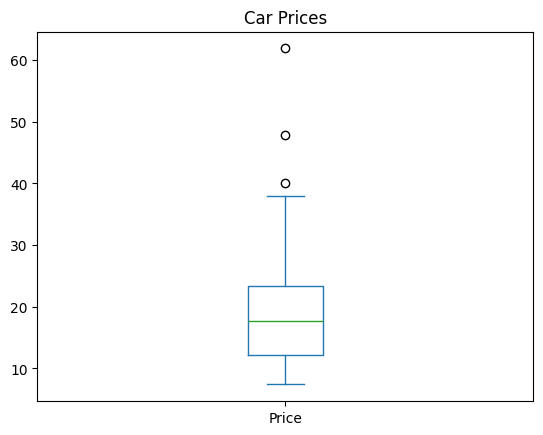

In [15]:
cars_df = pd.read_csv("../data/cars93.csv")

# box plot of car prices
cars_df["Price"].plot(kind="box", title="Car Prices")
cars_df["Price"].describe()

### Winsorization

Is a method used to limit extreme outliers. Named after Charles P. Winsor. The Scipy [winsorize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html) function defaults to the lower 5% of data and upper 5% of data, though it can vary.

Winsorization isn't exactly _antiquated_, though we can use it on:
- small datasets: where extreme values pollute our data
- financial data: where extreme values are noise
- econometrics: where extreme values stabilize our results

           Price  Winsorized_Price
count  93.000000         93.000000
mean   19.509677         19.126882
std     9.659430          8.399432
min     7.400000          8.400000
25%    12.200000         12.200000
50%    17.700000         17.700000
75%    23.300000         23.300000
max    61.900000         37.700000


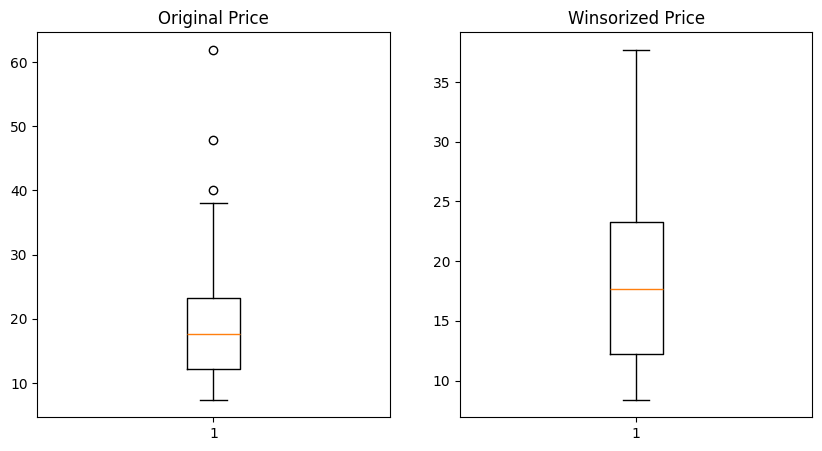

In [16]:
from scipy.stats.mstats import winsorize

cars_df["Winsorized_Price"] = winsorize(cars_df["Price"], limits=[0.05, 0.05])

print(cars_df[["Price", "Winsorized_Price"]].describe())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Price")
plt.boxplot(cars_df["Price"])
plt.subplot(1, 2, 2)
plt.title("Winsorized Price")
plt.boxplot(cars_df["Winsorized_Price"])
plt.show()

There are models that focus on robust statistics: [Huber loss](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html), [Box–Cox, Yeo–Johnson](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer), etc.

### Trimming

Winsorization "fills in" extreme values whereas **trimming** just removes them. We need to be cautious about removing records.

### Intuition

We need to sift through our data. 

If the human height is less than or equal to zero, we need robust statistics to fill in our data. If human height is greater than or equal to 8 feet, well, we should consider Robert Wadlow at 8 feet 11 inches.

If LDL cholesterol levels fall below zero, we need robust statistics.

The most expensive car in the world is 30 million dollars.

The lowest temperature in the world is -273 degrees Celsius (0 degrees Kelvin). We can't go below that. (Physicists have now created an atomic gas in a laboratory that has negative Kelvin values.)

Suss out our data. Explore. Innovate.

## Dummy Variables

Pandas DataFrames, Series, and array-likes can include string values and [categories](https://pandas.pydata.org/docs/user_guide/categorical.html). 

We convert dummies, or indicator variables, to True/False or 0/1. Our species: Adelie, Chinstrap, and Gentoo _explode_ values to columns.

In [17]:
dummy_df = pd.get_dummies(penguins_df["species"], prefix="species", dtype=int)

penguins_df[dummy_df.columns] = dummy_df
penguins_df[["species"] + list(dummy_df.columns)].head()

,species,species_Adelie,species_Chinstrap,species_Gentoo
0,Adelie,1,0,0
1,Adelie,1,0,0
2,Adelie,1,0,0
3,Adelie,1,0,0
4,Adelie,1,0,0


In our `species` "Adelie" value, the `drop_first=True`, K-1, excludes the `species_Adelie` column. When the `species_Chinstrap` and `species_Gentoo` columns show records with both `0` or `False`, then we know it must be Adelie.

In [18]:
penguins_df = create_penguins_df()

dummy_df = pd.get_dummies(penguins_df["species"], prefix="species", drop_first=True)
penguins_df[dummy_df.columns] = dummy_df

penguins_df[
    ~(penguins_df["species_Chinstrap"]) & ~(penguins_df["species_Gentoo"])
].head()

,species,island,clutch_completion,date_egg,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,delta_15_n,delta_13_c,species_Chinstrap,species_Gentoo
0,Adelie,Torgersen,True,2007-11-11,39.1,18.7,181.0,3750.0,male,NaN,NaN,False,False
1,Adelie,Torgersen,True,2007-11-11,39.5,17.4,186.0,3800.0,female,8.94956,-24.69454,False,False
2,Adelie,Torgersen,True,2007-11-16,40.3,18.0,195.0,3250.0,female,8.36821,-25.33302,False,False
3,Adelie,Torgersen,True,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
4,Adelie,Torgersen,True,2007-11-16,36.7,19.3,193.0,3450.0,female,8.76651,-25.32426,False,False


### Numeric Values

Our ML models rely on numbers. While there are algorithms capable of working with text, strings, and categories, these are exceptions, not the rule.

There are various vectorizers that transform text into numbers.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(penguins_df["island"])
penguins_df["island_count_vector"] = list(X.toarray())
penguins_df[["island", "island_count_vector"]].head()

,island,island_count_vector
0,Torgersen,"[0, 0, 1]"
1,Torgersen,"[0, 0, 1]"
2,Torgersen,"[0, 0, 1]"
3,Torgersen,"[0, 0, 1]"
4,Torgersen,"[0, 0, 1]"


In [20]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(n_features=3)
X = vectorizer.fit_transform(penguins_df["island"])
penguins_df["island_hashed_vector"] = list(X.toarray())
penguins_df[["island", "island_hashed_vector"]].head()

,island,island_hashed_vector
0,Torgersen,"[0.0, 0.0, -1.0]"
1,Torgersen,"[0.0, 0.0, -1.0]"
2,Torgersen,"[0.0, 0.0, -1.0]"
3,Torgersen,"[0.0, 0.0, -1.0]"
4,Torgersen,"[0.0, 0.0, -1.0]"


## Normalization

Linear regression, K-means, and K-nearest neighbor have features that don't scale well. If we have an absolutely huge value and an absolutely tiny value, they have disparate features. That's why normalization is useful.

Adult height in centimeters:
- Mean: 167
- Standard deviation: 10

Adult weight in kilograms (based on height):
- `10 + 0.35 * heights + np.random.normal(0, 8, n)`
- Mean: 67-68
- Standard deviation: 8-9

Adult neurons in the brain:
- Mean: 86 billion
- Standard deviation: 8 billion

Height versus weight is effectively zero.

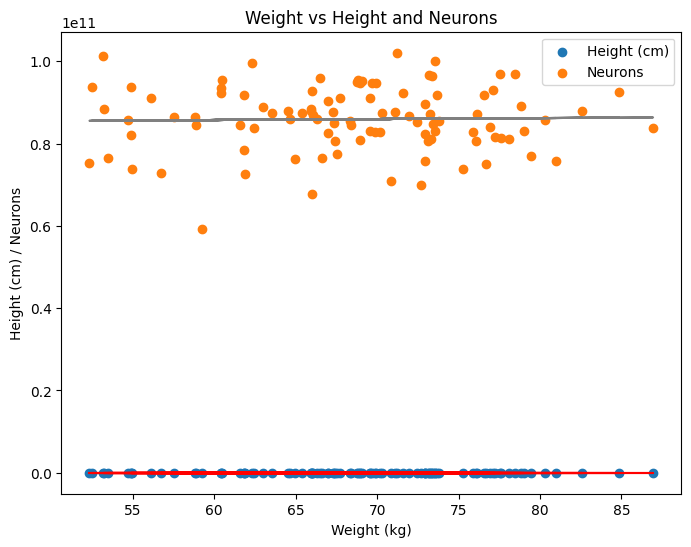

In [21]:
mean_height_cm = 167.0
stddev_height_cm = 10.0
mean_neurons_in_brain = 86_000_000_000
stddev_neurons_in_brain = 8_000_000_000
n = 100

heights = np.random.normal(mean_height_cm, stddev_height_cm, n)
heights = np.round(heights, 2)

weights = 10 + 0.35 * heights + np.random.normal(0, 8, n)
weights = np.round(weights, 2)

neurons_in_brain = np.random.normal(mean_neurons_in_brain, stddev_neurons_in_brain, n)
neurons_in_brain = np.round(neurons_in_brain, 2)

human_df = pd.DataFrame(
    {
        "height_cm": heights,
        "weight_kg": weights,
        "neurons_in_brain": neurons_in_brain,
    }
)

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(human_df["weight_kg"], human_df["height_cm"], label="Height (cm)")
m, b = np.polyfit(human_df["weight_kg"], human_df["height_cm"], 1)
ax.plot(human_df["weight_kg"], m * human_df["weight_kg"] + b, color="red")

ax.scatter(human_df["weight_kg"], human_df["neurons_in_brain"], label="Neurons")
m, b = np.polyfit(human_df["weight_kg"], human_df["neurons_in_brain"], 1)
ax.plot(human_df["weight_kg"], m * human_df["weight_kg"] + b, color="gray")

plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm) / Neurons")
plt.title("Weight vs Height and Neurons")
plt.legend()
plt.show()


We can **normalize** `neurons_in_brain` to divide by one billion. 

Neurons aren't correlated with weight. They're fairly random. But, weight is correlated with height.

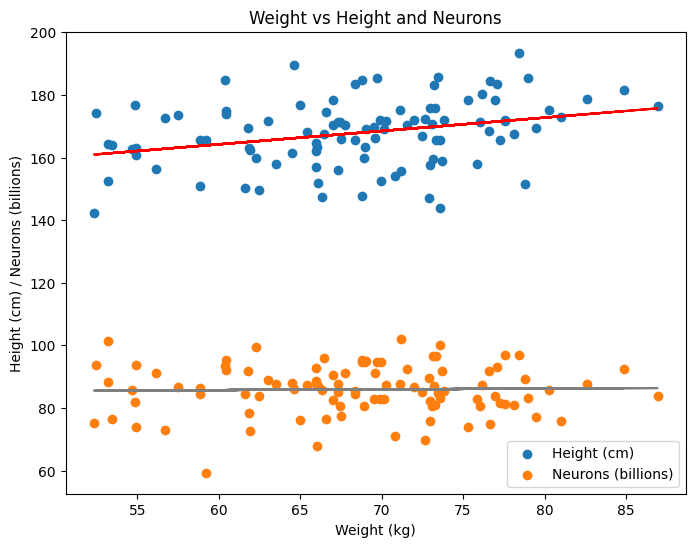

In [22]:
human_df["neurons_billions"] = human_df["neurons_in_brain"] / 1_000_000_000

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(human_df["weight_kg"], human_df["height_cm"], label="Height (cm)")
m, b = np.polyfit(human_df["weight_kg"], human_df["height_cm"], 1)
ax.plot(human_df["weight_kg"], m * human_df["weight_kg"] + b, color="red")

ax.scatter(
    human_df["weight_kg"], human_df["neurons_billions"], label="Neurons (billions)"
)
m, b = np.polyfit(human_df["weight_kg"], human_df["neurons_billions"], 1)
ax.plot(human_df["weight_kg"], m * human_df["weight_kg"] + b, color="gray")

plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm) / Neurons (billions)")
plt.title("Weight vs Height and Neurons")
plt.legend()
plt.show()

There are various normalization algorithms, [sklearn.preprocessing](https://scikit-learn.org/stable/api/sklearn.preprocessing.html), based on scalers, transformers, and normalizers.

Normalization is common in ML models: see Huber loss, RANSAC, Box-Cox, Yeo-Johnson, etc. Normalizing before linear regression will allow the coefficients to sync with features.

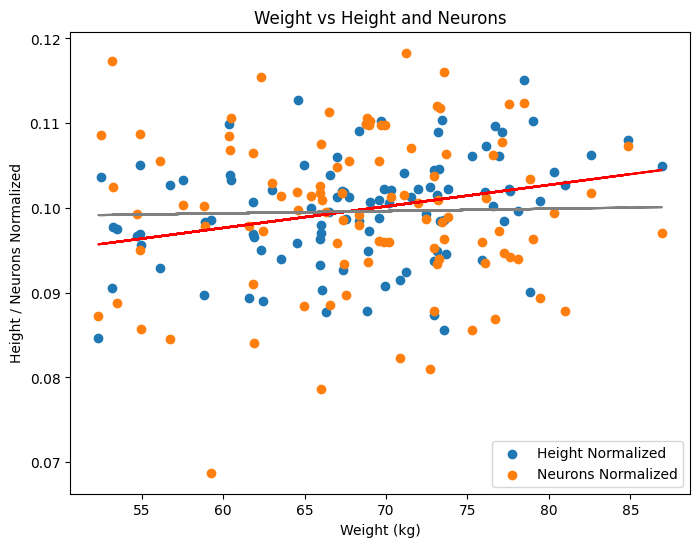

In [23]:
from sklearn.preprocessing import normalize

normalized_data = normalize(human_df[["height_cm", "neurons_in_brain"]], axis=0)

human_df["height_normalized"] = normalized_data[:, 0]
human_df["neurons_normalized"] = normalized_data[:, 1]

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(
    human_df["weight_kg"], human_df["height_normalized"], label="Height Normalized"
)
m, b = np.polyfit(human_df["weight_kg"], human_df["height_normalized"], 1)
ax.plot(human_df["weight_kg"], m * human_df["weight_kg"] + b, color="red")

ax.scatter(
    human_df["weight_kg"], human_df["neurons_normalized"], label="Neurons Normalized"
)
m, b = np.polyfit(human_df["weight_kg"], human_df["neurons_normalized"], 1)
ax.plot(human_df["weight_kg"], m * human_df["weight_kg"] + b, color="gray")

plt.xlabel("Weight (kg)")
plt.ylabel("Height / Neurons Normalized")
plt.title("Weight vs Height and Neurons")
plt.legend()
plt.show()

## Reflect

Machine learning isn't magic. The quality of our model is based the quality of our data.